<a href="https://colab.research.google.com/github/RickeyEstes2/Build_Your_Own_AI_Investor/blob/master/Complete_Financial_Risk_Assessment_NLP_Download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color='#3CB371'> Financial Risk Assessment Using LLMs </font>
<font color='#32CD32'> This is a highly comprehensive project that involves multiple facets of NLP, including sentiment analysis, named entity recognition, and text classification. This code provides an entire pipeline to assess the financial risk associated with a company, using textual data from news sources. The code uses the following pre-trained models: </font> \\
<font color='#B0C4DE'>  
1. HuggingFace Sentiment Analysis Model: This model is based on a transformer architecture, typically fine-tuned on datasets like IMDB reviews or Twitter data. It is used to analyze the sentiment of news articles and classify them into positive, negative, or neutral.  
2. SpaCy's Named Entity Recognition: The en_core_web_sm model is pre-trained on a large corpus of web pages and news data to extract named entities, such as people, organizations, and places, that are relevant for understanding news context.  
The risk score is derived from sentiment analysis and entity recognition, helping identify potential investment risks.   
 </font>

##<font color='#32CD32'> How are LLMs used? </font>
<font color='#B0C4DE'> LLMs help make this system robust by leveraging their language understanding to extract meaningful insights from the text, such as assessing sentiment and understanding context. This information is vital for determining potential financial risks for investors.Large Language Models (LLMs) are used primarily for sentiment analysis of the financial news articles. </font> \\
<font color='DeepSkyBlue'>  
1. Sentiment Analysis:

- The sentiment_analysis function uses a pre-trained transformer model from the HuggingFace Transformers library. Specifically, a transformer-based LLM such as DistilBERT or BERT is used for analyzing the sentiment of news articles.

- These models have been pre-trained on massive corpora of textual data, which include social media texts, news articles, and other publicly available datasets. They can effectively understand the nuances of human language, making them well-suited for understanding financial news and determining if the overall sentiment is positive, negative, or neutral.

- LLMs help in determining the market's perception of a company, which directly impacts the financial risk. For instance, if negative news is prevalent, it might indicate a higher risk for investors.
2. Language Understanding:
- LLMs are also used in performing Named Entity Recognition (NER). Though in the current implementation we use SpaCy's model, larger LLMs like BERT or similar models could be used for more advanced entity recognition.
- LLMs recognize named entities (e.g., company names, monetary amounts, locations), which are critical to understanding the topics discussed in the news articles. Recognizing entities like "bankruptcy," "lawsuit," or a particular company's name allows the system to assess which pieces of news are more impactful.

#<font color='darkseagreen'> Overview and Learning Objectives </font>
#<font color='#32CD32'>
- This projct aims to teach students how to use Natural Language Processing (NLP) tools to assess financial risks based on textual data.
-  you will learn how to gather data from news articles, perform sentiment analysis, and extract entities to identify financial risk indicators.
- The key technologies being used in this project are:
- HuggingFace Transformers for sentiment analysis, leveraging pre-trained large language models (LLMs) to determine positive, negative, or neutral sentiment in news articles.
- SpaCy for Named Entity Recognition (NER) to detect key entities like companies, events, and financial terms.
- BeautifulSoup for web scraping to gather recent news articles from Google News.
- Pandas and Matplotlib for data manipulation and visualization.
- The data used includes scraped financial news articles for companies like Tesla, NIO, Rivian, Lucid Motors, QuantumScape, and Britsh American Tobacco which are analyzed to assess their risk potential.
- Three primary steps: loading and processing data, analyzing it using NLP, and assessing the financial risk based on sentiment and entity classification.
 </font> \\

###<font color='#32CD32'> Step 1: Setting Up the Environment

In [ ]:
# Let's start by installing necessary libraries in Google Colab
# This includes HuggingFace Transformers, SpaCy, and financial sentiment analysis packages.
!pip install transformers
!pip install spacy
!pip install beautifulsoup4
!pip install yfinance

In [ ]:
# Load Spacy's pre-trained model for Named Entity Recognition
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Check if a GPU (CUDA) is available for faster computations; otherwise, use the CPU
# Using GPU is recommended for faster generation as Stable Diffusion is computationally intensive.
import torch
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"You're using: {gpu_name}")
else:
    print("No GPU detected.")
device = "cuda" if torch.cuda.is_available() else "cpu"

You're using: Tesla T4


###<font color='#32CD32'> Importing Libraries and Tools

In [ ]:
import pandas as pd
import numpy as np
import requests
import re
import spacy
from bs4 import BeautifulSoup
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import yfinance as yf
import matplotlib.pyplot as plt

# Explanation: This code imports all the necessary tools and libraries we will need.
# - 'pandas', 'numpy': Data manipulation libraries
# - 'requests', 'BeautifulSoup': Libraries for web scraping
# - 'spacy': Entity recognition library, we download the 'en_core_web_sm' model to recognize entities in text
# - 'transformers': Hugging Face library to utilize LLMs for sentiment analysis and classification
# - 'yfinance': Library to fetch financial data
# - 'matplotlib': Library for plotting graphs

###<font color='#32CD32'> Step 2: Fetch Financial News Data (Data Collection)


In [ ]:

def get_news(company_name, limit=10):
    """
    Function to scrape Google News for financial news articles about a given company.
    """
    url = f"https://www.google.com/search?q={company_name}+financial+news&tbm=nws"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    headlines = []

    # Extract headlines based on specific classes used by Google News articles
    for item in soup.find_all('div', attrs={'class': 'BNeawe vvjwJb AP7Wnd'}):
        headlines.append(item.text)
        if len(headlines) >= limit:
            break
    return headlines

###<font color='#32CD32'> Example usage to get news articles related to Tesla, NIO, and some smaller companies with acquisition potential

In [ ]:
tesla_news = get_news("Tesla")
nio_news = get_news("NIO")
rivian_news = get_news("Rivian")
lucid_news = get_news("Lucid Motors")
quantumscape_news = get_news("QuantumScape")
british_american_tobacco_news = get_news("British American Tobacco")

print("Financial News for Tesla:", tesla_news)
print("Financial News for NIO:", nio_news)
print("Financial News for Rivian:", rivian_news)
print("Financial News for Lucid Motors:", lucid_news)
print("Financial News for QuantumScape:", quantumscape_news)
print("Financial News for British American Tobacco:", british_american_tobacco_news)

# Explanation: This function `get_news` fetches recent financial news headlines for a specific company.
# We use Google News to get relevant articles, which will then be used for sentiment analysis.

Financial News for Tesla: ['Options trader says Tesla is priced for perfection ahead of earnings. How to profit from a pullback', "Tesla Shares Soars 5% on Barclays' Price Target Boost to $325", 'Tesla Faces Mixed Financial Outlook Amid Growing Competition and Strategic Initiatives', "Tesla post-earnings performance: will Tesla's Q3 2024 earnings spark stock movement?", "While Tesla Boasts 'Unparalleled' New Ver. Model Y, Lei Jun Seems to Battle with 'YU7'", "Three Reasons Why Wells Fargo Predicts 70% Plunge on Tesla's Stock", 'Tesla shares fall after Elon Musk’s glitzy ‘Cybercab’ event disappoints', 'Why Tesla Stock Popped 22% on Earnings; Biggest Gain in 11 Years; Shares Turn Positive on Year; More News', 'Watch These Tesla Price Levels as Stock Hits Brakes Ahead of Q4 Deliveries Report', "While Tesla Boasts 'Unparalleled' New Ver. Model Y, Lei Jun Seems to Battle with 'YU7' Financial News"]
Financial News for NIO: ['NIO Inc. (NIO) is Attracting Investor Attention: Here is What You S

###<font color='#32CD32'> Step 3: Perform Sentiment Analysis (Risk Assessment)



##<font color='DeepPink'> Details of Pre-trained Models: </font>
<font color='DeepSkyBlue'>  
1. Hugging Face Sentiment Analysis Pipeline: This uses LLMs like DistilBERT, which is a smaller version of BERT designed to be faster and more efficient, while still capturing important language features. </font>
  - The original BERT (Bidirectional Encoder Representations from Transformers) model is pre-trained on a vast corpus that includes books, Wikipedia, and other publicly available texts. This model is then fine-tuned for specific tasks like sentiment analysis.

- <font color='DeepSkyBlue'>  SpaCy's NER: The en_core_web_sm model used here is trained on a variety of English text data, which helps it recognize entities like companies, locations, and events in the financial news.


In [ ]:
def sentiment_analysis(news_list):
    """
    Function to perform sentiment analysis on a list of news articles.
    """
    sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", revision="af0f99b",  device=0 if torch.cuda.is_available() else -1)

# Explanation: The model 'distilbert-base-uncased-finetuned-sst-2-english' was chosen because it is a lightweight, pre-trained transformer model designed for sentiment analysis.
# It is fine-tuned on the Stanford Sentiment Treebank (SST-2) dataset, which is a well-established dataset used for sentiment classification tasks.
#In this code, specifying "revision='af0f99b'" points to a specific snapshot of the model (distilbert-base-uncased-finetuned-sst-2-english).
#the revision parameter - ensures the version of the model used here is stable and will not vary between runs, which is important for maintaining reproducibility in production environments.
# specify the device argument, ensuring that the model will run on the GPU if available.
# The model strikes a good balance between accuracy and computational efficiency, making it suitable for quick, real-time sentiment analysis in this financial risk assessment project.
    results = []

    for article in news_list:
        analysis = sentiment_analyzer(article)[0]
        results.append({
            'article': article,
            'label': analysis['label'],
            'score': analysis['score']
        })
    return results

###<font color='#32CD32'> Explanation: The `sentiment_analysis` function takes a list of news articles, and uses HuggingFace's pre-trained sentiment analysis model to determine if the sentiment is positive, negative, or neutral.
- The output is a list of sentiment scores that indicate the overall sentiment regarding the company.
-This helps us understand if the news generally indicates positive or negative outlook for the company, impacting its financial risk.

In [ ]:
# Performing sentiment analysis on news articles of multiple companies
sentiment_results_tesla = sentiment_analysis(tesla_news)
sentiment_results_nio = sentiment_analysis(nio_news)
sentiment_results_rivian = sentiment_analysis(rivian_news)
sentiment_results_lucid = sentiment_analysis(lucid_news)
sentiment_results_quantumscape = sentiment_analysis(quantumscape_news)
sentiment_results_british_american_tobacco = sentiment_analysis(british_american_tobacco_news)

Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


In [ ]:
# Convert results to DataFrames for easier viewing
pd.DataFrame(sentiment_results_tesla)
pd.DataFrame(sentiment_results_nio)
pd.DataFrame(sentiment_results_rivian)
pd.DataFrame(sentiment_results_lucid)
pd.DataFrame(sentiment_results_quantumscape)
pd.DataFrame(sentiment_results_british_american_tobacco)

,article,label,score
0,Results centre,POSITIVE,0.994994
1,BAT shares climb as first-half results fuel US...,POSITIVE,0.999484
2,Could Buying British American Tobacco Stock To...,NEGATIVE,0.997140
3,Reinet disposes of stake in British American T...,NEGATIVE,0.975659
4,Directors’ Deals: Stand-in finance director cu...,NEGATIVE,0.991661
5,BAT recognised as a Financial Times Climate Le...,POSITIVE,0.980463
6,British American Tobacco (LSE:BATS) Appoints N...,POSITIVE,0.992087
7,Favourable Signals For British American Tobacc...,POSITIVE,0.996770
8,"The Zacks Analyst Blog Philip Morris, Altria a...",NEGATIVE,0.950665
9,British American Tobacco p.l.c. (BTI): Hedge F...,NEGATIVE,0.998911


In [ ]:
# Explanation: The `sentiment_analysis` function takes a list of news articles, and uses HuggingFace's pre-trained sentiment analysis model to determine if the sentiment is positive, negative, or neutral.
# The output is a list of sentiment scores that indicate the overall sentiment regarding the company.
# This helps us understand if the news generally indicates positive or negative outlook for the company, impacting its financial risk.


## Step 4: Named Entity Recognition (NER) for Key Entities

In [ ]:
def perform_ner(news_list):
    """
    Function to perform Named Entity Recognition (NER) on the financial news.
    """
    nlp = spacy.load('en_core_web_sm')
    entities = []

    for article in news_list:
        doc = nlp(article)
        for ent in doc.ents:
            entities.append({
                'article': article,
                'entity_text': ent.text,
                'entity_type': ent.label_
            })
    return entities

In [ ]:
# Performing NER on news articles of multiple companies
ner_results_tesla = perform_ner(tesla_news)
ner_results_nio = perform_ner(nio_news)
ner_results_rivian = perform_ner(rivian_news)
ner_results_lucid = perform_ner(lucid_news)
ner_results_quantumscape = perform_ner(quantumscape_news)
ner_results_british_american_tobacco = perform_ner(british_american_tobacco_news)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


##Explanation: Named Entity Recognition (NER) is applied to detect key entities in news articles, such as company names, locations, currency values, and events. This helps identify specific topics being discussed in the news.
## SpaCy's pre-trained 'en_core_web_sm' model is used to extract entities.

In [ ]:
# Convert results to DataFrames for easier viewing
pd.DataFrame(ner_results_tesla)
pd.DataFrame(ner_results_nio)
pd.DataFrame(ner_results_rivian)
pd.DataFrame(ner_results_lucid)
pd.DataFrame(ner_results_quantumscape)
pd.DataFrame(ner_results_british_american_tobacco)

,article,entity_text,entity_type
0,BAT shares climb as first-half results fuel US...,first-half,DATE
1,BAT shares climb as first-half results fuel US...,US,GPE
2,Could Buying British American Tobacco Stock To...,British American Tobacco Stock,ORG
3,Reinet disposes of stake in British American T...,Reinet,ORG
4,Reinet disposes of stake in British American T...,British American Tobacco,ORG
5,Directors’ Deals: Stand-in finance director cu...,BAT,ORG
6,BAT recognised as a Financial Times Climate Le...,Financial Times Climate,ORG
7,British American Tobacco (LSE:BATS) Appoints N...,British American Tobacco,ORG
8,Favourable Signals For British American Tobacc...,British,NORP
9,"The Zacks Analyst Blog Philip Morris, Altria a...",Blog Philip Morris,PERSON


## Step 5: Risk Assessment Based on Data Analysis

In [ ]:

def assess_risk(sentiment_results, ner_results):
    """
    Function to assess risk based on sentiment analysis and named entity recognition results.
    """
    risk_score = 0

    # Assign weights for sentiment
    for result in sentiment_results:
        if result['label'] == 'NEGATIVE':
            risk_score += 1  # Negative news increases risk
        elif result['label'] == 'POSITIVE':
            risk_score -= 0.5  # Positive news reduces risk

    # Add scores based on entity recognition
    risk_keywords = ['crisis', 'loss', 'bankruptcy', 'decline', 'lawsuit']
    for entity in ner_results:
        if entity['entity_text'].lower() in risk_keywords:
            risk_score += 2  # High impact keyword detected, increase risk

    return risk_score

# Assessing risk for multiple companies based on sentiment and entities
risk_tesla = assess_risk(sentiment_results_tesla, ner_results_tesla)
risk_nio = assess_risk(sentiment_results_nio, ner_results_nio)
risk_rivian = assess_risk(sentiment_results_rivian, ner_results_rivian)
risk_lucid = assess_risk(sentiment_results_lucid, ner_results_lucid)
risk_quantumscape = assess_risk(sentiment_results_quantumscape, ner_results_quantumscape)
risk_british_american_tobacco = assess_risk(sentiment_results_british_american_tobacco, ner_results_british_american_tobacco)

print(f"Overall Financial Risk Score for Tesla: {risk_tesla}")
print(f"Overall Financial Risk Score for NIO: {risk_nio}")
print(f"Overall Financial Risk Score for Rivian: {risk_rivian}")
print(f"Overall Financial Risk Score for Lucid Motors: {risk_lucid}")
print(f"Overall Financial Risk Score for QuantumScape: {risk_quantumscape}")
print(f"Overall Financial Risk Score for QuantumScape: {risk_british_american_tobacco}")

# Explanation: The `assess_risk` function combines both sentiment results and entity recognition data to come up with a financial risk score.
# - Sentiment analysis is used to weigh negative or positive news.
# - Specific high-risk keywords are used to further adjust the risk score.
# A higher risk score indicates a greater financial risk associated with the company.


Overall Financial Risk Score for Tesla: 4.0
Overall Financial Risk Score for NIO: 5.5
Overall Financial Risk Score for Rivian: 7.0
Overall Financial Risk Score for Lucid Motors: -2.0
Overall Financial Risk Score for QuantumScape: 2.5
Overall Financial Risk Score for QuantumScape: 2.5


###<font color='#32CD32'>Explanation of the code above:   The `assess_risk` function combines both sentiment results and entity recognition data to come up with a financial risk score.
-  Sentiment analysis is used to weigh negative or positive news.
- A higher risk score indicates a greater financial risk associated with the company.</font>

## Step 6: Visualizing the Risk

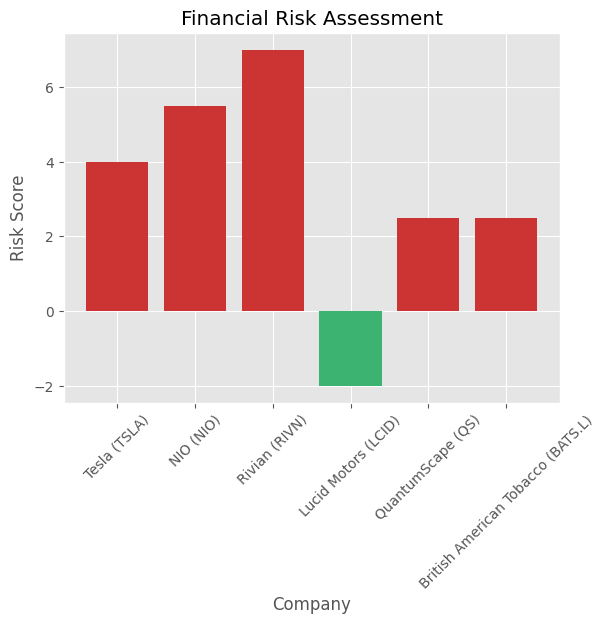

In [ ]:

# Plotting risk scores for multiple companies
companies = ['Tesla (TSLA)', 'NIO (NIO)', 'Rivian (RIVN)', 'Lucid Motors (LCID)', 'QuantumScape (QS)', 'British American Tobacco (BATS.L)']
risk_scores = [risk_tesla, risk_nio, risk_rivian, risk_lucid, risk_quantumscape, risk_british_american_tobacco]

plt.bar(companies, risk_scores, color=['#CC3333' if score > 0 else '#3CB371' for score in risk_scores])
plt.title('Financial Risk Assessment')
plt.xlabel('Company')
plt.ylabel('Risk Score')
plt.xticks(rotation=45)
plt.show()


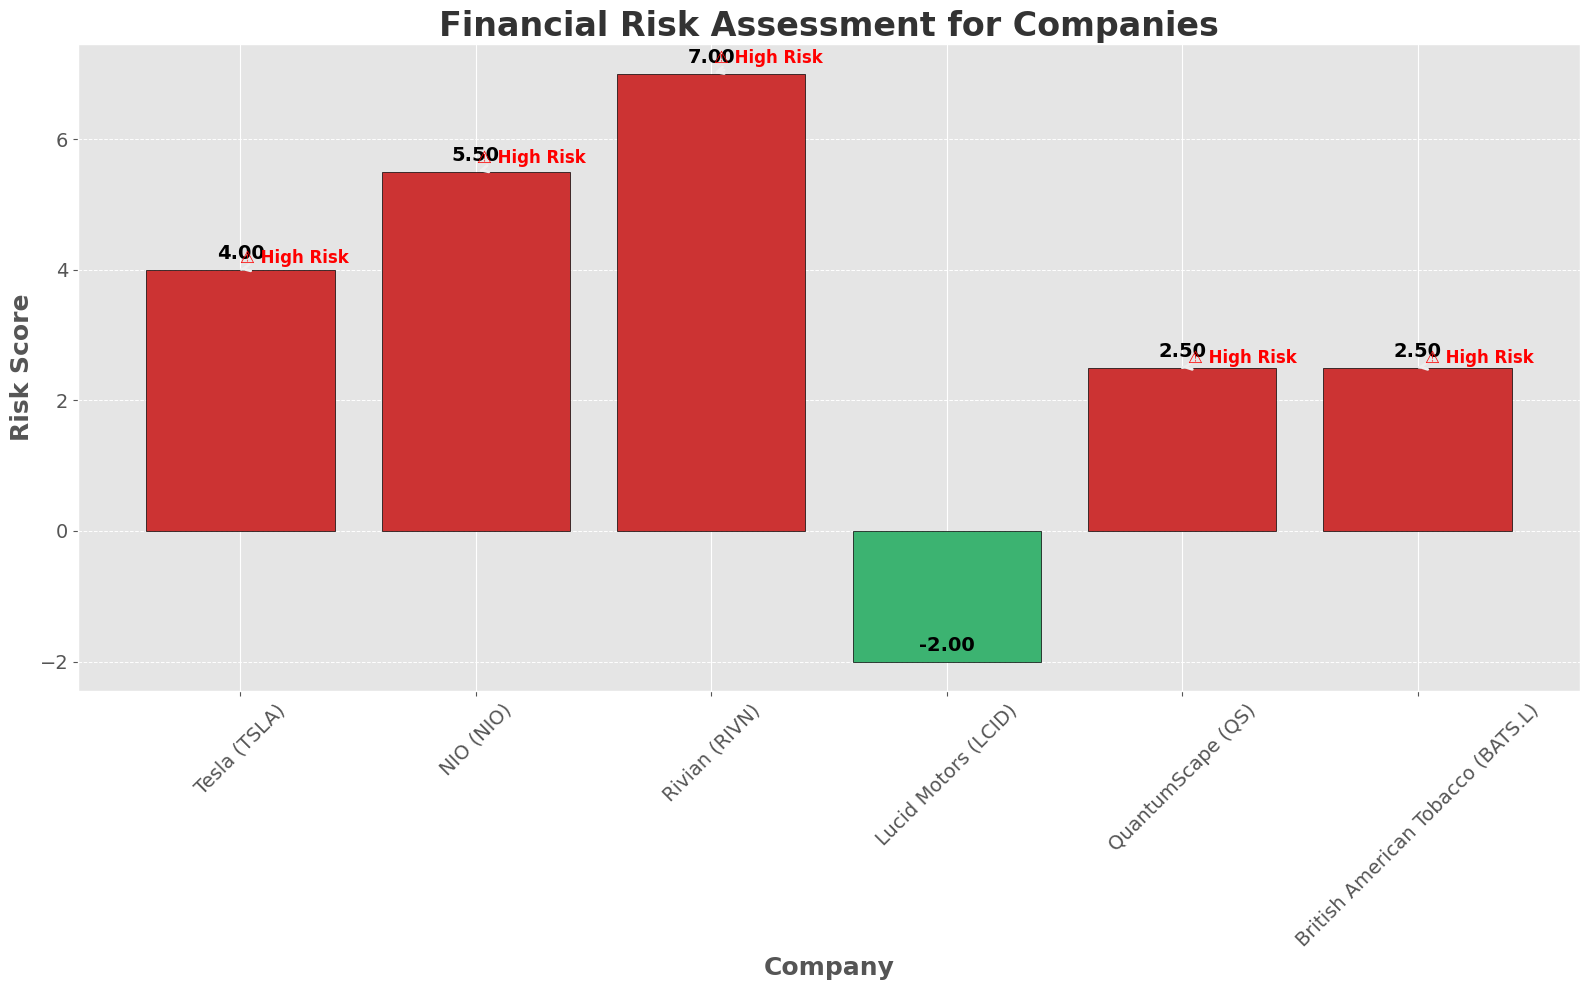

In [ ]:

# Import Seaborn for improved visualization
import seaborn as sns

# Set a modern and visually appealing style
plt.style.use('ggplot')  # Use a universally available style

# Plotting risk scores for multiple companies
companies = ['Tesla (TSLA)', 'NIO (NIO)', 'Rivian (RIVN)', 'Lucid Motors (LCID)', 'QuantumScape (QS)', 'British American Tobacco (BATS.L)']
risk_scores = [risk_tesla, risk_nio, risk_rivian, risk_lucid, risk_quantumscape, risk_british_american_tobacco]

# Set the figure size to make it suitable for presentations
plt.figure(figsize=(16, 10))

# Create the bar chart with modern color settings
# Use a gradient of colors to highlight increasing risk, with high-risk being darkest red
bars = plt.bar(companies, risk_scores, color=['#3CB371' if score <= 0 else '#4682B4' if score <= 1 else '#FFBF00' if score <= 2 else '#CC3333' for score in risk_scores], edgecolor='black')
#market blue, risk amber, persian red
# Adding title and labels with enhanced fonts
plt.title('Financial Risk Assessment for Companies', fontsize=24, fontweight='bold', color='#333333', family='DejaVu Sans')
plt.xlabel('Company', fontsize=18, fontweight='bold', family='DejaVu Sans')
plt.ylabel('Risk Score', fontsize=18, fontweight='bold', family='DejaVu Sans')
plt.xticks(rotation=45, fontsize=14, family='DejaVu Sans')
plt.yticks(fontsize=14, family='DejaVu Sans')

# Annotate each bar with the risk score value for better insight
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', fontsize=14, color='black', fontweight='bold', family='DejaVu Sans')

# Add annotations to highlight significant risks, including emoji to make it more engaging
high_risk_threshold = 2  # Define a threshold for high risk
for i, score in enumerate(risk_scores):
    if score > high_risk_threshold:
        plt.annotate(
            '⚠️ High Risk',
            xy=(i, score),
            xytext=(i, score + 1),
            textcoords='offset points',
            arrowprops=dict(facecolor='red', arrowstyle='->', lw=2),
            fontsize=12,
            fontweight='bold',
            color='red',
            family='DejaVu Sans'
        )

# Add gridlines to improve readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Tighten layout for a polished look
plt.tight_layout()

# Display the updated plot
plt.show()

#####<font color='orchid'> Explanation </font>
<font color='royalblue'>   Finally, we visualize the financial risk for multiple companies using a simple bar graph. If the risk score is positive, the bar is colored red (indicating higher risk). If negative or zero, it's colored green.